In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [25]:
path = "hotel_bookings.csv"
df = pd.read_csv(path)
df



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Limpieza de datos (EDA)
# SE OBSERVA QUE HAY VALORES FALTANTES EN LAS COLUMNAS DE LA TABLA
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [32]:
df['country'].value_counts()
 # Contar valores nulos en la columna 'country'

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

In [34]:
df["agent"].isnull().sum()

np.int64(16340)

In [35]:
df["company"].isnull().sum()

np.int64(112593)

In [36]:
# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()

children         4
country        488
agent        16340
company     112593
dtype: int64

In [ ]:
# Rellenar la columna children con valor 0 de City Hotel
df.loc[
    (df['hotel'] == 'City Hotel') &
    (df['children'].isna()),
    'children'] = 0

# Mostar nuevamente las columnas con valores faltantes debido a que se ha rellenado la columna children del  City Hotel
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()

country       488
agent       16340
company    112593
dtype: int64

In [ ]:
# Expplicacion : La columna company tiene valores nulos , la cantidad de datos nulos es de 488 , 
# por lo cual se procede con el relleno de los datos , es decir que  se reemplazará el valor nulo por 0 y se interpretará como que no existe una empresa asociada.
df['company'].fillna(0, inplace=True)

# se vuelve a ejecutar el codigo anterior para verificar que la columna company ya no tiene valores nulos
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()


C:\Users\mico1\AppData\Local\Temp\ipykernel_21464\307222520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna(0, inplace=True)


country      488
agent      16340
dtype: int64

In [ ]:
# Se rellena los valores nulos en la columna 'country' con 'Desconocido'
# Este rellenado ayuda a conservar las filas en las que no se registró el país del cliente
df['country'].fillna("Desconocido", inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [46]:
# se vuelve a ejecutar el codigo anterior para verificar que la columna company ya no tiene valores nulos
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()

agent    16340
dtype: int64

In [48]:
# Se procede con el rellenado los valores nulos en la columna 'agent' con 0
# Esto  es debido a que se indica que la reserva no fue realizada por un agente
df['agent'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

C:\Users\mico1\AppData\Local\Temp\ipykernel_21464\1758190380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)


In [ ]:
# la columna children estaba en float  y se convierte a integer para evitar problemas en el análisis posterior
df['children'] = df['children'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [57]:
diccionario  = {
    "hotel": "Hotel",
    "adults":"Adults",
    "children":"Children",
    "babies":"Babies",
    "meal":"Meal",
    "country":"Country",
    "is_canceled":"Is Canceled"
  }

df.rename(columns=diccionario, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Hotel                           119390 non-null  object 
 1   Is Canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   Adults                          119390 non-null  int64  
 10  Children                        119390 non-null  int64  
 11  Babies                          119390 non-null  int64  
 12  Meal            

In [ ]:
# Reemplazar 0 por 'No' y 1 por 'Sí' en la columna is_canceled
df['Is Canceled'] = df['Is Canceled'].replace({0: 'No', 1: 'Sí'})

# Revisar los cambios
df['Is Canceled'].value_counts()

Is Canceled
No    75166
Sí    44224
Name: count, dtype: int64

In [ ]:
# Se modifica lo nombres de algunas columnas por medio de un diccionario
# Esto es para que los nombres de las columnas sean más descriptivos y fáciles de entender
diccionario_2 = {
    "agent": "Agent",
    "booking": "Booking",
     "adr": "Average Daily Rate",
     "market_segment": "Market Segment",
}

df.rename(columns=diccionario_2, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Hotel                           119390 non-null  object 
 1   Is Canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   Adults                          119390 non-null  int64  
 10  Children                        119390 non-null  int64  
 11  Babies                          119390 non-null  int64  
 12  Meal            

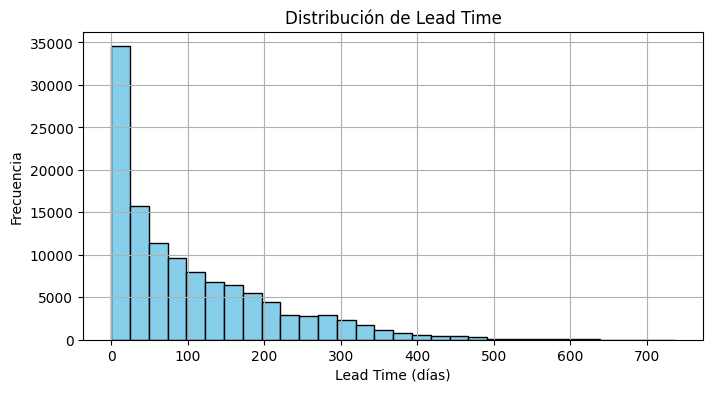

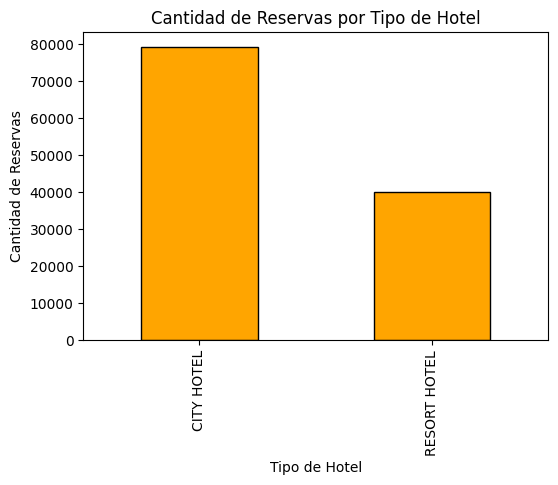

In [ ]:
#  Histograma de los plazos de reservas'
plt.figure(figsize=(8, 4))
df['lead_time'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Lead Time')
plt.xlabel('Lead Time (días)')
plt.ylabel('Frecuencia')
plt.show()
# Analisis del histograma:
# La mayoría de las reservas se realizan con poca anticipación, aunque existen algunos de plazos de reservas muy alto.

# Gráfico de barras de los tipos de hotel
plt.figure(figsize=(6, 4))
df['Hotel'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Cantidad de Reservas por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de Reservas')
plt.show()
# Analisis del grafico de barras:
# El tipo de hotel con mayor cantidad de reservas es el City Hotel, seguido por Resort Hotel.

In [ ]:


# Visualización 1: Boxplot de 'Average Daily Rate' por tipo de hotel y estado de cancelación
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Hotel', y='Average Daily Rate', hue='Is Canceled')
plt.title('Tarifa Diaria Promedio por Tipo de Hotel y Cancelación')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Tarifa Diaria Promedio')
plt.legend(title='¿Cancelado?')
plt.show()
# Interpretación:
# Se observa que las tarifas diarias promedio tienden a ser más altas en el Resort Hotel.
# Además, las reservas canceladas suelen tener una mayor variabilidad en la tarifa diaria.

# Visualización 2: Gráfico de barras apiladas de reservas por mes de llegada y estado de cancelación
plt.figure(figsize=(12, 6))
month_cancel = pd.crosstab(df['arrival_date_month'], df['Is Canceled'])
month_cancel = month_cancel.reindex(['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
month_cancel.plot(kind='bar', stacked=True, color=['#4daf4a','#e41a1c'])
plt.title('Reservas por Mes de Llegada y Estado de Cancelación')
plt.xlabel('Mes de Llegada')
plt.ylabel('Cantidad de Reservas')
plt.legend(title='¿Cancelado?')
plt.tight_layout()
plt.show()
# Interpretación:
# Los meses de verano (julio y agosto) presentan el mayor número de reservas.
# Sin embargo, la proporción de cancelaciones varía a lo largo del año, siendo más alta en algunos meses específicos.